In [125]:
#начало работы. проверка датасета
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'viz.xlsx'
df = pd.read_excel(file_path, sheet_name=1)
df.head(10)

,sex,age,marital_status,number_children,q_parent_same,employment,household_income,q_inequality_problem,perc_share_foreign,perc_share_ch,...,college_nat_lc,loweduc_nat_lc,unemp_imm_lc,unemp_nat_lc,poor_lc,effort_poor,effort_rich,total_donation,respondent_ID,duration
0,1,32,1.0,1.0,1.0,4.0,4.0,4.0,33.0,80.0,...,40.400002,8.9,11.512196,5.479268,19.200001,0.0,1.0,500,1,13.933333
1,1,55,2.0,1.0,1.0,1.0,3.0,4.0,7.0,10.0,...,27.600000,11.4,6.644268,3.446353,18.700001,0.0,1.0,600,2,14.333333
2,1,21,1.0,1.0,1.0,5.0,3.0,5.0,7.0,40.0,...,27.600000,11.4,6.644268,3.446353,18.700001,0.0,1.0,0,3,19.450001
3,2,27,1.0,1.0,1.0,1.0,4.0,4.0,16.0,50.0,...,27.600000,11.4,6.644268,3.446353,18.700001,1.0,1.0,200,4,10.550000
4,1,44,2.0,1.0,1.0,3.0,7.0,4.0,10.0,60.0,...,34.000000,7.9,4.837365,2.302497,12.100000,0.0,1.0,600,5,15.900000
5,1,43,3.0,2.0,1.0,1.0,4.0,5.0,14.0,30.0,...,31.799999,7.3,4.326995,1.811752,12.100000,0.0,0.0,500,6,44.233334
6,2,28,1.0,2.0,1.0,1.0,2.0,3.0,48.0,30.0,...,33.700001,8.3,5.474352,2.606635,15.400000,0.0,1.0,100,7,28.733334
7,1,33,5.0,2.0,1.0,1.0,5.0,3.0,20.0,49.0,...,27.600000,11.4,6.644268,3.446353,18.700001,1.0,1.0,150,8,27.850000
8,2,57,2.0,1.0,1.0,1.0,5.0,4.0,20.0,50.0,...,24.799999,10.4,6.894942,3.117695,16.700001,0.0,0.0,1000,9,26.233334
9,2,49,2.0,1.0,1.0,1.0,5.0,3.0,50.0,30.0,...,27.600000,11.4,6.644268,3.446353,18.700001,1.0,1.0,250,10,10.033334


In [ ]:
1 задание
Насколько сильно ответ на вопрос: "Вы считаете, что правительство должно заботиться только о местных жителях или обо всех? " 
зависит от пола и занятости респондента?
Пол (1=М, 2=Ж)	
employment	Занятость 
1=Полный рабочий день, 
2=Неполный рабочий день, 
3=Самозанятый,
4=Безработный,
5=Обучающийся, 
6=Не работает и не ищет работу, 
7=На пенсии
ответы: (Шкала от 1 до 7, где 1=только и исключительно о местных, 7=обо всех одинаково)

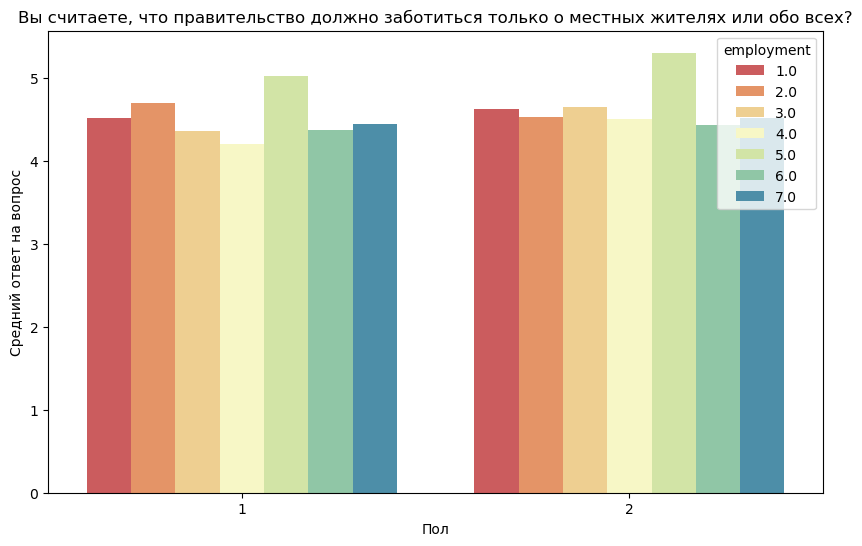

In [141]:
#Код 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
file_path = 'viz.xlsx'
df = pd.read_excel(file_path, sheet_name=1)
grouped_data = df.groupby(['sex', 'employment'])['q_govt_imm'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='q_govt_imm', hue='employment', data=grouped_data, palette='Spectral')
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt.title('Вы считаете, что правительство должно заботиться только о местных жителях или обо всех?')
plt.xlabel('Пол')
plt.ylabel('Средний ответ на вопрос')
plt.show()

In [ ]:
Комментарии к первому заданию:
В целом, ответы мужчин и женщин на вопрос примерно одинаковы.
У женщин немного повыше средние показатели, что может быть объяснено чуть большей лояльностью и эмоциональностью женского пола.

Средние значения ответов в различных группах занятости колеблются где-то в пределах 4,2-5,3.
Например, люди, занятые на полный рабочий день, имеют средние ответы значительно ниже, чем у обучающихся.
У обучающихся самый высокий показатель среднего ответа на вопрос.
Они больше всего верят в то, что правительство готово заботиться обо всех одинаково.
Эх, молодость...идеализм!:)

In [ ]:
2 задание
Как отличаются в зависимости от возраста человека и страны взгляды на ставку налога, 
которую должен платить 1% самых богатых жителей страны?

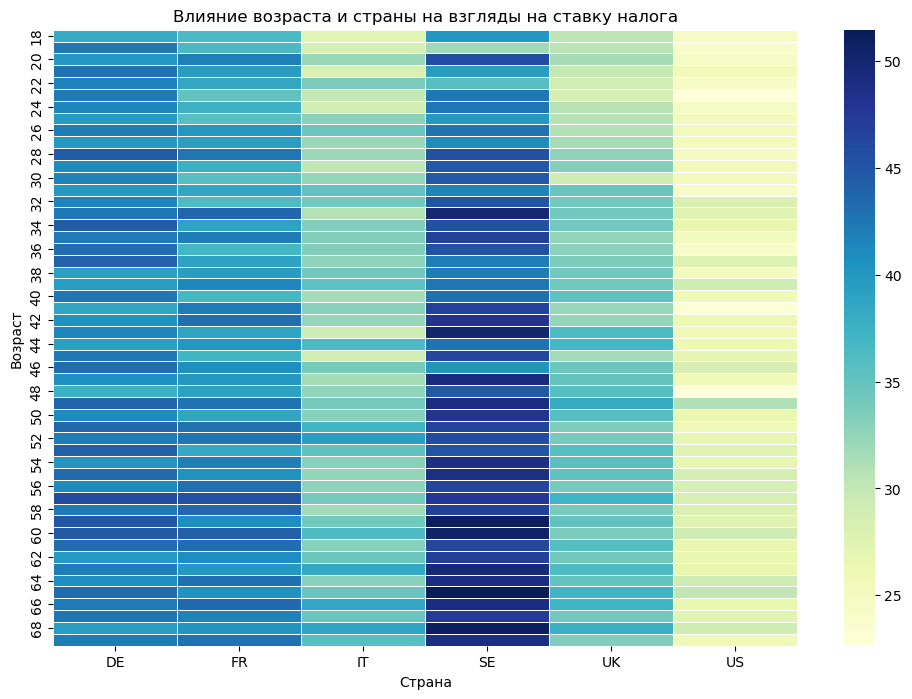

In [8]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from openpyxl import load_workbook
file_path = 'viz.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

df = df.sort_values(by='age')

plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(index='age', columns='country', values='tax_top1', aggfunc='mean')
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=.5)
plt.title('Влияние возраста и страны на взгляды на ставку налога')
plt.xlabel('Страна')
plt.ylabel('Возраст')
plt.show()

In [ ]:
Комментарии ко второму заданию:
    В Швеции самые радикальные взгляды на повышение ставки налога для богатых.
    Как видно на графике, особенно в этой стране возраст действительно достаточно сильно влияет на мнение по данному вопросу
    : чем старше респондент, тем выше, по его мнению, должен быть налог.
    В остальных странах также присутствует данная тенденция, но гораздо менее выраженно. 
    Что касается США, в этой стране наиболее лояльно относятся к обеспеченным и 
    даже опрошенные преклонного возраста называли достаточно небольшую ставку.
    Страна возможностей! :P
    

In [ ]:
3 задание
Есть ли влияние политических взглядов на отношение к неравенству по доходам как к проблеме и наоборот?


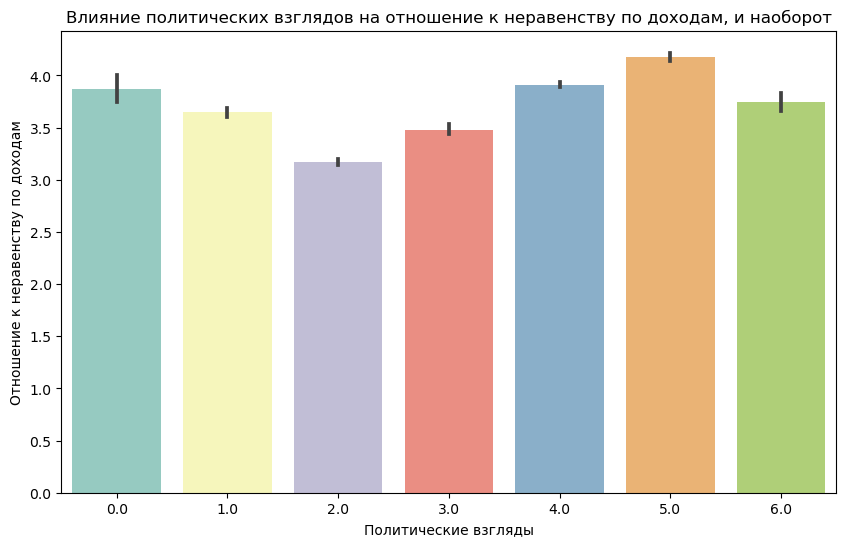

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
file_path = 'viz.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='party_voted', y='q_inequality_problem', data=df, palette='Set3')
plt.title('Влияние политических взглядов на отношение к неравенству по доходам, и наоборот')
plt.xlabel('Политические взгляды')
plt.ylabel('Отношение к неравенству по доходам')
plt.show()


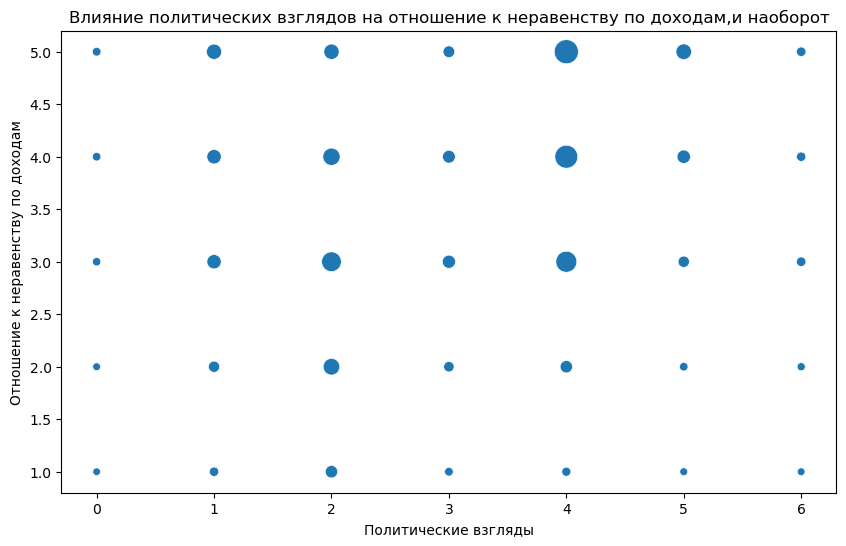

In [7]:
#version 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'viz.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

grouped_data = df.groupby(['party_voted', 'q_inequality_problem']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='party_voted', y='q_inequality_problem', size='count', data=grouped_data, sizes=(30, 300), legend=False)
plt.title('Влияние политических взглядов на отношение к неравенству по доходам,и наоборот')
plt.xlabel('Политические взгляды')
plt.ylabel('Отношение к неравенству по доходам')
plt.show()



In [ ]:
комментарии к 3 заданию:
на обоих графиках можно проследить главную тенденцию -  
что приверженцы левопартийских вглядов считают неравенство доходов серьезной проблемой, 
в отличие, что совершенно логично и понятно, от правых. 